# **Adım 1: Veri Setini Tanıma**

Bu adımda veri setini anlamaya odaklanırız. Veri setini inceleyerek, sütunların türlerini, eksik değerleri ve genel veri yapısını belirleriz.

In [27]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from IPython.display import HTML
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('alzheimers_disease_data.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [28]:
data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


# **Adım 2: Veri Temizleme ve Ön İşleme**

Bu adımda, veri setinde herhangi bir hata veya anormallik varsa, bu verileri temizleriz. Ayrıca, modelleme için uygun hale getirmek için veriyi ön işleriz.

In [29]:
missing_values = data.isnull().sum()
print(missing_values)

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [30]:
stat_summary_numeric = data.describe()
display(HTML(stat_summary_numeric.to_html()))

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,0.252210,0.144253,0.150768,0.200558,0.092601,0.148906,134.264774,89.847836,225.197519,124.335944,59.463533,228.281496,14.755132,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,0.434382,0.351428,0.357906,0.400511,0.289940,0.356079,25.949352,17.592496,42.542233,43.366584,23.139174,101.986721,8.613151,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194,0.005312,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112.000000,74.000000,190.252963,87.195798,39.095698,137.583222,7.167602,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,91.000000,225.086430,123.342593,59.768237,230.301983,14.441660,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,157.000000,105.000000,262.031657,161.733733,78.939050,314.839046,22.161028,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,119.000000,299.993352,199.965665,99.980324,399.941862,29.991381,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


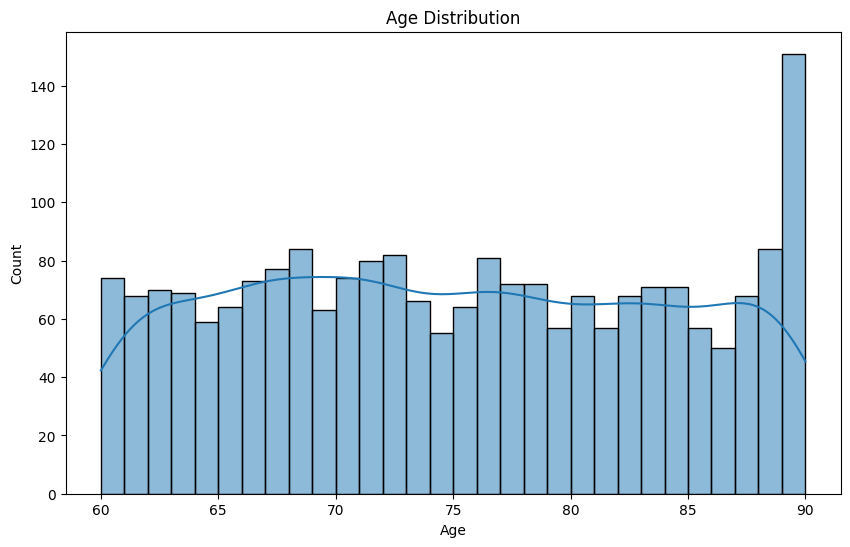

In [31]:
plt.figure(figsize = (10, 6))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

# **Adım 3: Veri Keşfi ve Analizi (EDA)**

Veri keşfi ve analizi, veriyi daha derinlemesine anlamamızı sağlar. Bu adımda veri setindeki ilişkileri ve eğilimleri anlamaya çalışırız.

In [32]:
data = data.drop(columns=['DoctorInCharge'])


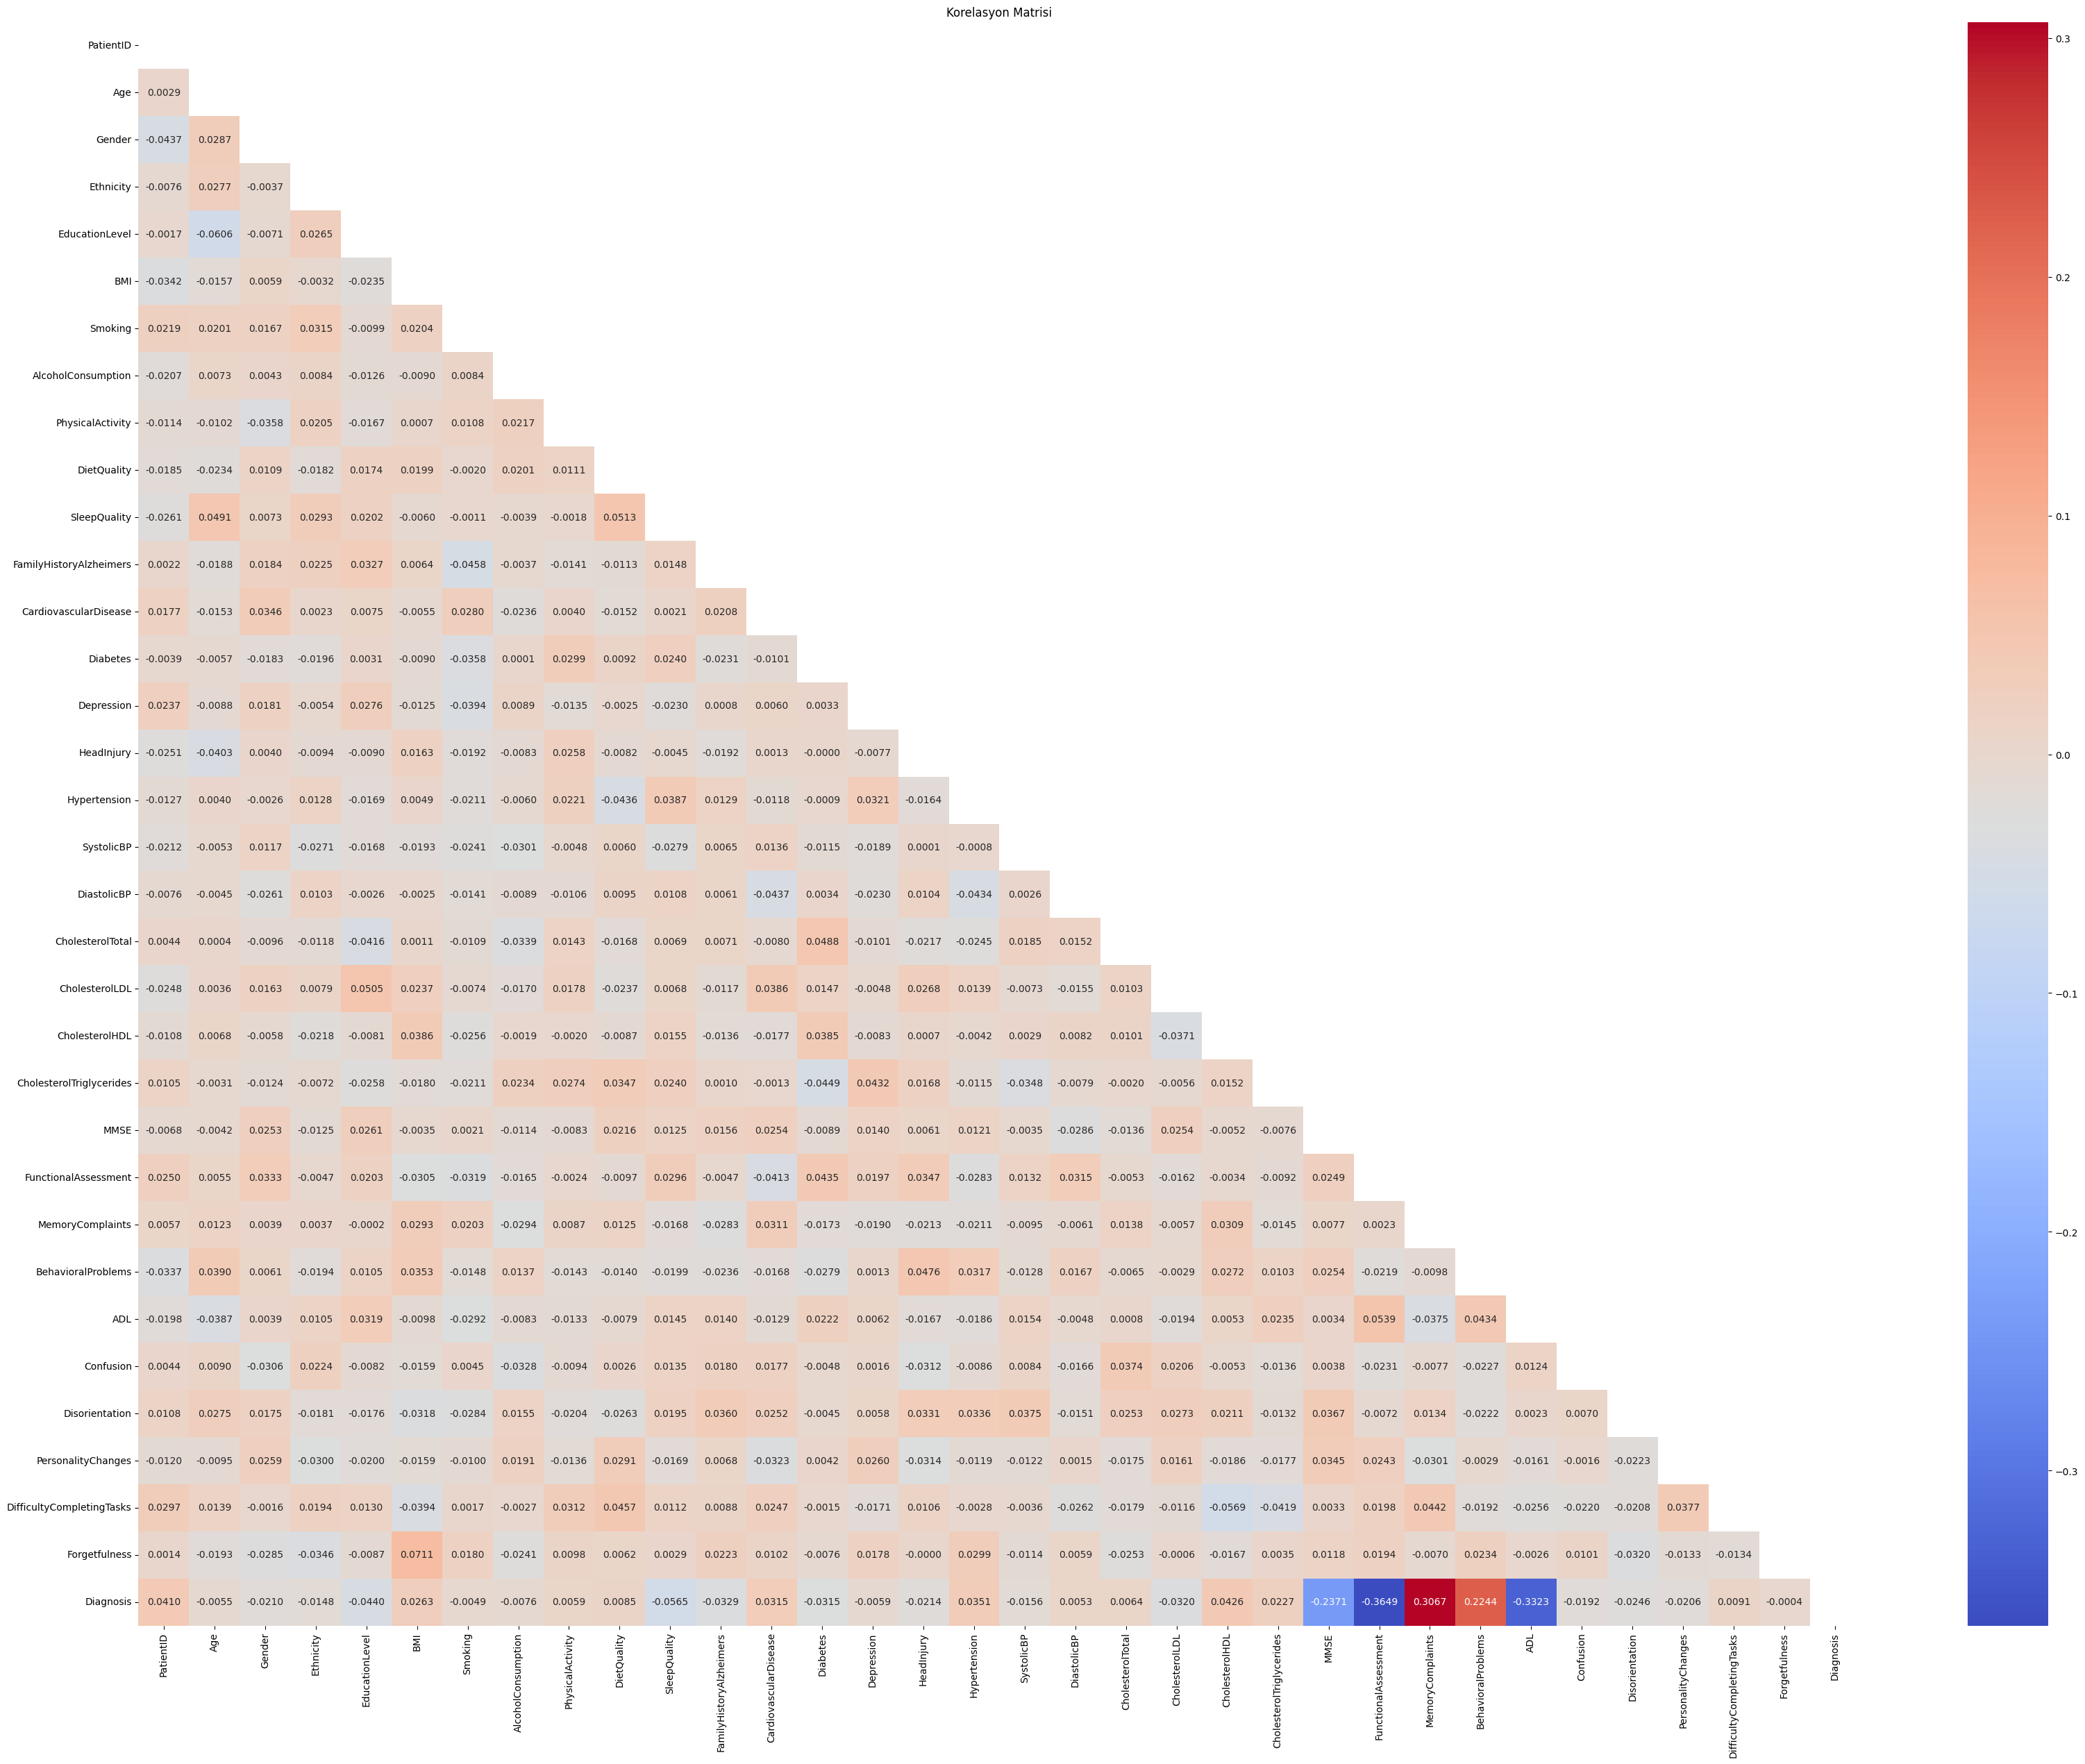

In [33]:
#korelasyon matrisi

corr_matrix = data.corr()

np.fill_diagonal(corr_matrix.values, np.nan)

corr_matrix = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(bool))



plt.figure(figsize=(40,30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.4f')
plt.title('Korelasyon Matrisi')
plt.show()

# **Adım 4: Özellik Seçimi ve Mühendisliği**

Özellik seçimi ve mühendisliği, modelin performansını artırmak için en önemli adımlardan biridir. Bu adımda model için en iyi özellikleri seçeriz ve gerekirse yeni özellikler oluştururuz.

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Modeli tüm özelliklerle oluştur ve eğitelim
model_full = RandomForestClassifier(random_state=42)
model_full.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapalım
y_test_pred_full = model_full.predict(X_test)

# Modelin performansını ölçelim
test_accuracy_full = accuracy_score(y_test, y_test_pred_full)
print(f"Tüm Özelliklerle Test Doğruluğu: {test_accuracy_full:.4f}")
print("Classification Report (Tüm Özellikler):")
print(classification_report(y_test, y_test_pred_full))


Tüm Özelliklerle Test Doğruluğu: 0.9054
Classification Report (Tüm Özellikler):
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       401
           1       0.95      0.80      0.86       244

    accuracy                           0.91       645
   macro avg       0.92      0.88      0.90       645
weighted avg       0.91      0.91      0.90       645



In [41]:
#Feature importance analizi yaparak "diagnosis"e en cok etki eden sutunları bulalım.


target_variable = 'Diagnosis'

X = data.drop(columns = [target_variable]) #bağımsız değişkenimiz
y = data[target_variable] #bağımlı değişkenimiz

from sklearn.model_selection import train_test_split

# Veri setini %70 eğitim ve %30 test olarak bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modeli oluştur ve eğit
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Feature importance değerlerini alalım
importances = model.feature_importances_

# Özellik isimleri ile birlikte sırala
feature_importance = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

print("Feature Importance:")
print(feature_importance)


Feature Importance:
FunctionalAssessment         0.182889
ADL                          0.157500
MMSE                         0.113366
MemoryComplaints             0.078877
PatientID                    0.048121
BehavioralProblems           0.044296
CholesterolTriglycerides     0.028668
BMI                          0.028098
CholesterolHDL               0.027519
AlcoholConsumption           0.027415
DietQuality                  0.027165
SleepQuality                 0.026978
CholesterolTotal             0.026821
DiastolicBP                  0.026791
CholesterolLDL               0.025964
PhysicalActivity             0.025082
Age                          0.023526
SystolicBP                   0.023360
EducationLevel               0.008889
Ethnicity                    0.007324
Hypertension                 0.003777
Forgetfulness                0.003723
Depression                   0.003499
Gender                       0.003498
FamilyHistoryAlzheimers      0.003440
Smoking                      0

In [42]:
# 0.01'den daha düşük öneme sahip özellikleri cıkaracagız

selected_features = feature_importance[feature_importance > 0.01].index
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print(f"Seçilen Özellikler: {list(selected_features)}")


Seçilen Özellikler: ['FunctionalAssessment', 'ADL', 'MMSE', 'MemoryComplaints', 'PatientID', 'BehavioralProblems', 'CholesterolTriglycerides', 'BMI', 'CholesterolHDL', 'AlcoholConsumption', 'DietQuality', 'SleepQuality', 'CholesterolTotal', 'DiastolicBP', 'CholesterolLDL', 'PhysicalActivity', 'Age', 'SystolicBP']


# **Adım 5: Model Seçimi ve Eğitimi**

Bu adımda, hedefimiz için uygun bir makine öğrenmesi modelini seçer ve veriyi kullanarak bu modeli eğitiriz.

In [43]:
# Modeli seçilen özelliklerle yeniden eğit
model.fit(X_train_selected, y_train)

# Test verisi üzerinde tahmin yap
y_test_pred = model.predict(X_test_selected)

# Modelin performansını ölç
from sklearn.metrics import accuracy_score, classification_report

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Doğruluğu: {test_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_test_pred))


Test Doğruluğu: 0.9225
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       401
           1       0.95      0.84      0.89       244

    accuracy                           0.92       645
   macro avg       0.93      0.91      0.92       645
weighted avg       0.92      0.92      0.92       645



# **Adım 6: Model Optimizasyonu**

Modelin performansını artırmak için optimizasyon tekniklerini kullanırız. Bu adımda, modelin en iyi sonuçları vermesi için ince ayar yaparız.

In [46]:
#hiperparamatre optimizasyonunu gerçekleştirmedim